In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
# This data frame is ready to be used as input for a model

df = pd.read_csv('//home/jorgemsr123/shared/Housing Colombia/housing_information_with dummies', index_col='Unnamed: 0')

In [4]:
df

,areabalcon,areaconstruida,banos,depositos,estrato,garajes,habitaciones,latitud,longitud,numeroascensores,valor,antiguedad_original_16 a 30 años,antiguedad_original_9 a 15 años,antiguedad_original_Entre 0 y 5 años,antiguedad_original_Entre 10 y 20 años,antiguedad_original_Entre 5 y 10 años,antiguedad_original_Menos de 1 año,antiguedad_original_Más de 20 años,antiguedad_original_Más de 30 años,antiguedad_original_Remodelado,balcon_Si,banoservicio_Si,conjuntocerrado_Si,cuarto_de_escoltas_Si,cuartodeservicio_Si,estudioobiblioteca_Si,garajecubierto_Si,gimnasio_Si,halldealcobasoestar_Si,instalaciondegas_Si,jacuzzi_Si,jardin_Si,parqueaderovisitantes_Si,piscina_Si,plantaelectrica_Si,porteriaovigilancia_Si,remodelado_Si,saloncomunal_Si,sauna_yo_turco_Si,tipodegaraje_Independiente,tipodegaraje_Ninguno,tipodegaraje_Propio,tipodegaraje_Servidumbre,vista_Interior,vista_Ninguno,zona_de_bbq_Si,zonadelavanderia_Si,zonaninos_Si,zonasverdes_Si
0,10.00,145.0,3.0,1.0,6.0,2.0,3.0,4.697760,-74.039581,2.0,9.000000e+08,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.00,114.0,3.0,0.0,4.0,0.0,3.0,4.734622,-74.046137,0.0,5.481475e+08,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,30.00,170.0,4.0,1.0,6.0,3.0,2.0,4.653789,-74.053574,1.0,1.500000e+09,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.00,61.0,1.0,0.0,6.0,1.0,1.0,4.679389,-74.055616,1.0,4.950000e+08,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.00,56.0,1.0,0.0,5.0,1.0,1.0,4.721266,-74.046616,0.0,2.500000e+08,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144981,0.00,118.0,3.0,0.0,5.0,1.0,3.0,4.684436,-74.045657,0.0,8.000000e+08,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
144982,10.00,89.0,3.0,0.0,3.0,1.0,3.0,4.633356,-74.127106,0.0,3.200000e+08,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
144983,0.00,88.0,3.0,0.0,6.0,2.0,2.0,4.655212,-74.052569,0.0,9.500000e+08,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
144984,25.68,173.0,3.0,1.0,6.0,3.0,2.0,4.656130,-74.051094,0.0,1.450000e+09,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133752 entries, 0 to 144985
Data columns (total 49 columns):
areabalcon                                133752 non-null float64
areaconstruida                            133752 non-null float64
banos                                     133752 non-null float64
depositos                                 133752 non-null float64
estrato                                   133752 non-null float64
garajes                                   133752 non-null float64
habitaciones                              133752 non-null float64
latitud                                   133752 non-null float64
longitud                                  133752 non-null float64
numeroascensores                          133752 non-null float64
valor                                     133752 non-null float64
antiguedad_original_16 a 30 años          133752 non-null float64
antiguedad_original_9 a 15 años           133752 non-null float64
antiguedad_original_Entre 0 y 5

In [9]:
X = df.drop('valor',axis=1).values
y = df['valor'].values

array([[ 10.  , 145.  ,   3.  , ...,   1.  ,   0.  ,   0.  ],
       [  0.  , 114.  ,   3.  , ...,   0.  ,   0.  ,   0.  ],
       [ 30.  , 170.  ,   4.  , ...,   1.  ,   0.  ,   1.  ],
       ...,
       [  0.  ,  88.  ,   3.  , ...,   0.  ,   0.  ,   0.  ],
       [ 25.68, 173.  ,   3.  , ...,   1.  ,   0.  ,   0.  ],
       [  0.  , 106.  ,   2.  , ...,   0.  ,   0.  ,   0.  ]])

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

X_train= scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [15]:
X_train.shape

(93626, 48)

In [16]:
X_test.shape

(40126, 48)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [18]:
# 48 neurons for layer base on the number of columns, 48 input columns 

model = Sequential()

model.add(Dense(48,activation='relu'))
model.add(Dense(48,activation='relu'))
model.add(Dense(48,activation='relu'))
model.add(Dense(48,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [19]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)

Epoch 1/400
732/732 [==============================] - 2s 3ms/step - loss: 545048942048444416.0000 - val_loss: 308120300980011008.0000
Epoch 2/400
732/732 [==============================] - 2s 3ms/step - loss: 190738295024517120.0000 - val_loss: 167461960282013696.0000
Epoch 3/400
732/732 [==============================] - 2s 3ms/step - loss: 157481710416560128.0000 - val_loss: 147311794795315200.0000
Epoch 4/400
732/732 [==============================] - 2s 3ms/step - loss: 136806828775309312.0000 - val_loss: 125920667227914240.0000
Epoch 5/400
732/732 [==============================] - 2s 3ms/step - loss: 114756157440000000.0000 - val_loss: 103959391341903872.0000
Epoch 6/400
732/732 [==============================] - 2s 3ms/step - loss: 95112514626387968.0000 - val_loss: 87727644778430464.0000
Epoch 7/400
732/732 [==============================] - 2s 3ms/step - loss: 81862308589993984.0000 - val_loss: 76662168346427392.0000
Epoch 8/400
732/732 [==============================] - 2s 3

In [20]:
losses = pd.DataFrame(model.history.history)

In [21]:
losses

,loss,val_loss
0,5.450489e+17,3.081203e+17
1,1.907383e+17,1.674620e+17
2,1.574817e+17,1.473118e+17
3,1.368068e+17,1.259207e+17
4,1.147562e+17,1.039594e+17
...,...,...
395,1.593618e+16,1.673306e+16
396,1.591537e+16,1.676730e+16
397,1.590829e+16,1.670607e+16
398,1.589693e+16,1.669234e+16


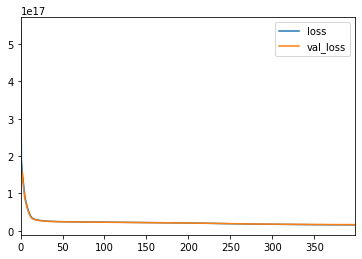

In [22]:
losses.plot()

In [23]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [26]:
predictions = model.predict(X_test)

In [27]:
# In average the error is like 80 millones, in a house of 2500 millones is Ok, but in a house of 500 millones, it is quite big.

mean_absolute_error(y_test,predictions)

77502835.85523102

In [28]:
# This value is almost twice the mean absolute error, it means the big mistakes in predictions are rather common.

np.sqrt(mean_squared_error(y_test,predictions))

129140767.74365398

In [29]:
# This value of the explained_varience is good, It can be improved, but it indicates that our model is explaing the prices of the houses 

explained_variance_score(y_test,predictions)

0.9181272714100526

In [30]:
# The mean value of the houses is 630 millones, it means a mean error of 80 millones, even though it is not great, it is ok

df['valor'].mean()

629211026.4602772

In [32]:
df['valor'].median()

480500000.0

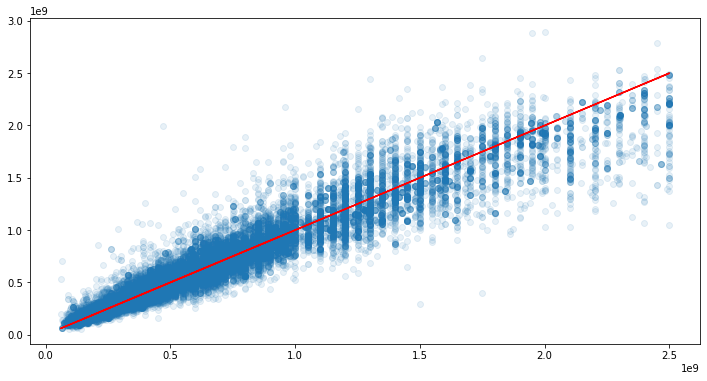

In [36]:
# This plot show us that our model is really good for houses up to 1000 milllones de pesos, between 1000 millones and 2000 millones, it star to struggle
# About 2000 millones the model is not ideal

plt.figure(figsize=(12,6))

# Our predictions
plt.scatter(y_test,predictions, alpha=0.1)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [57]:
df_y_test=pd.DataFrame(y_test)

In [62]:
df_y_predictions=pd.DataFrame(predictions)

In [64]:
errors= df_y_test-df_y_predictions

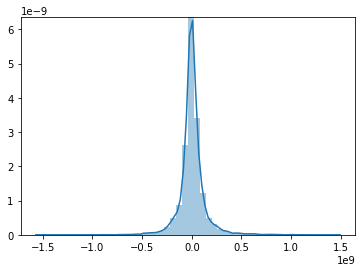

In [66]:
sns.distplot(errors)

40126

In [68]:
X.shape

(133752, 48)

In [81]:
# For new house, I try to consider my parents house

new_house=np.array([10.0, 130.5, 2.0,0,5.0,1.0, 3.0, 4.1, -74.1, 0.0,0.0, 1.0, 0.0, 0.0, 0.0, 0.0,0.0, 0.0, 0.0, 1.0, 0.0, 1, 0, 0,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,1,1,1], dtype='float64')

In [82]:
len(new_house)

48

In [84]:
new_house.reshape(-1,48)

array([[ 10. , 130.5,   2. ,   0. ,   5. ,   1. ,   3. ,   4.1, -74.1,
          0. ,   0. ,   1. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   1. ,   0. ,   1. ,   0. ,   0. ,   1. ,   0. ,   0. ,
          1. ,   1. ,   0. ,   0. ,   1. ,   0. ,   0. ,   1. ,   0. ,
          1. ,   0. ,   1. ,   0. ,   0. ,   0. ,   0. ,   0. ,   1. ,
          1. ,   1. ,   1. ]])

In [85]:
single_house= scaler.transform(new_house.reshape(-1,48))

In [86]:
# In Bogota the house of my parents would have a price of around 460 millones

model.predict(single_house)

array([[4.605354e+09]], dtype=float32)

In [87]:
df.head(2)

,areabalcon,areaconstruida,banos,depositos,estrato,garajes,habitaciones,latitud,longitud,numeroascensores,valor,antiguedad_original_16 a 30 años,antiguedad_original_9 a 15 años,antiguedad_original_Entre 0 y 5 años,antiguedad_original_Entre 10 y 20 años,antiguedad_original_Entre 5 y 10 años,antiguedad_original_Menos de 1 año,antiguedad_original_Más de 20 años,antiguedad_original_Más de 30 años,antiguedad_original_Remodelado,balcon_Si,banoservicio_Si,conjuntocerrado_Si,cuarto_de_escoltas_Si,cuartodeservicio_Si,estudioobiblioteca_Si,garajecubierto_Si,gimnasio_Si,halldealcobasoestar_Si,instalaciondegas_Si,jacuzzi_Si,jardin_Si,parqueaderovisitantes_Si,piscina_Si,plantaelectrica_Si,porteriaovigilancia_Si,remodelado_Si,saloncomunal_Si,sauna_yo_turco_Si,tipodegaraje_Independiente,tipodegaraje_Ninguno,tipodegaraje_Propio,tipodegaraje_Servidumbre,vista_Interior,vista_Ninguno,zona_de_bbq_Si,zonadelavanderia_Si,zonaninos_Si,zonasverdes_Si
0,10.0,145.0,3.0,1.0,6.0,2.0,3.0,4.697760,-74.039581,2.0,900000000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,114.0,3.0,0.0,4.0,0.0,3.0,4.734622,-74.046137,0.0,548147500.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [88]:
paisaje_la_primavera=np.array([60.0, 100.5, 2.0,0,3.0,4.0, 3.0, 4.1, -74.1, 0.0,0.0, 1.0, 0.0, 0.0, 0.0, 0.0,0.0, 0.0, 0.0, 1.0, 0.0, 0, 0, 0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1], dtype='float64')

In [89]:
our_house= scaler.transform(paisaje_la_primavera.reshape(-1,48))

In [90]:
model.predict(our_house)

array([[4.3011e+09]], dtype=float32)

In [117]:
trial = df.drop('valor',axis=1).iloc[1005]

In [118]:
trial= scaler.transform(trial.values.reshape(-1,48))

In [119]:
model.predict(trial)

array([[8.970873e+08]], dtype=float32)

In [120]:
df.iloc[1005]

areabalcon                                0.000000e+00
areaconstruida                            1.380000e+02
banos                                     5.000000e+00
depositos                                 0.000000e+00
estrato                                   6.000000e+00
garajes                                   2.000000e+00
habitaciones                              3.000000e+00
latitud                                   4.691816e+00
longitud                                 -7.405272e+01
numeroascensores                          1.000000e+00
valor                                     8.405000e+08
antiguedad_original_16 a 30 años          0.000000e+00
antiguedad_original_9 a 15 años           0.000000e+00
antiguedad_original_Entre 0 y 5 años      0.000000e+00
antiguedad_original_Entre 10 y 20 años    0.000000e+00
antiguedad_original_Entre 5 y 10 años     1.000000e+00
antiguedad_original_Menos de 1 año        0.000000e+00
antiguedad_original_Más de 20 años        0.000000e+00
antiguedad